In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [17]:
np.random.seed(39)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([5,1,147,157])
data=np.concatenate([data,outliers])
df=pd.DataFrame(data,columns=['values'])
df.head()

,values
0,64.048396
1,52.211210
2,48.546727
3,51.231992
4,56.060270


In [18]:
df.shape


(104, 1)

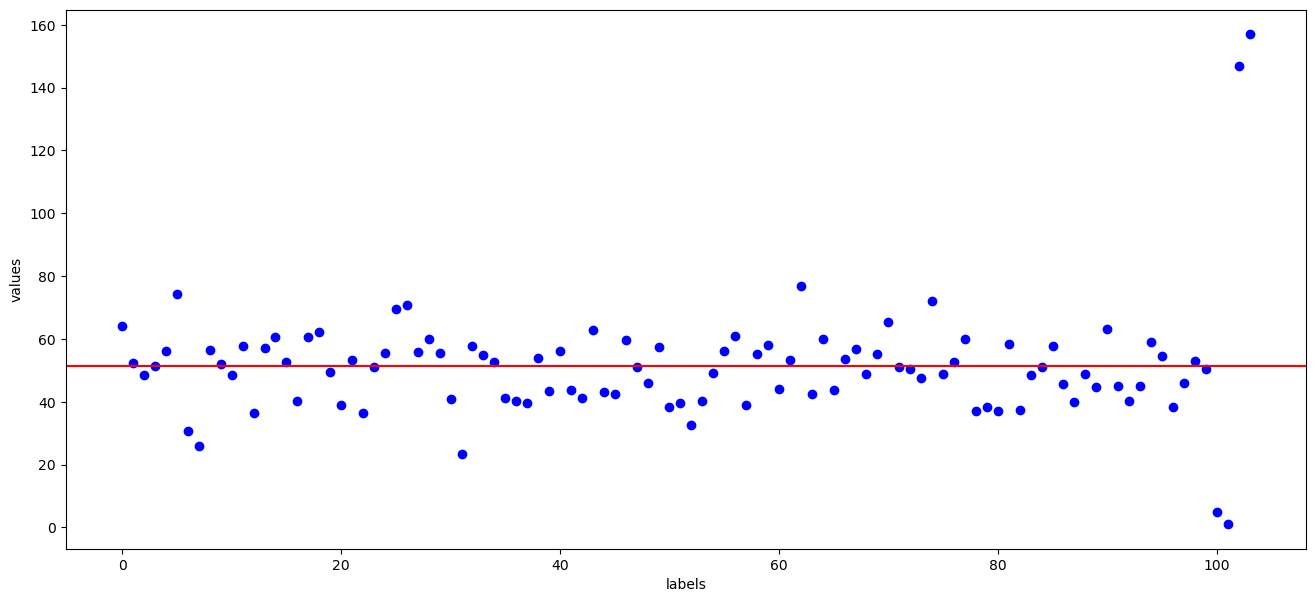

In [20]:
plt.figure(figsize=(16,7))
plt.scatter(range(len(df)),df['values'],color='blue',label='datapoint')
plt.axhline(y=df['values'].mean(),color='red',linestyle='solid',label='mean')
plt.xlabel('labels')
plt.ylabel('values')
plt.show()


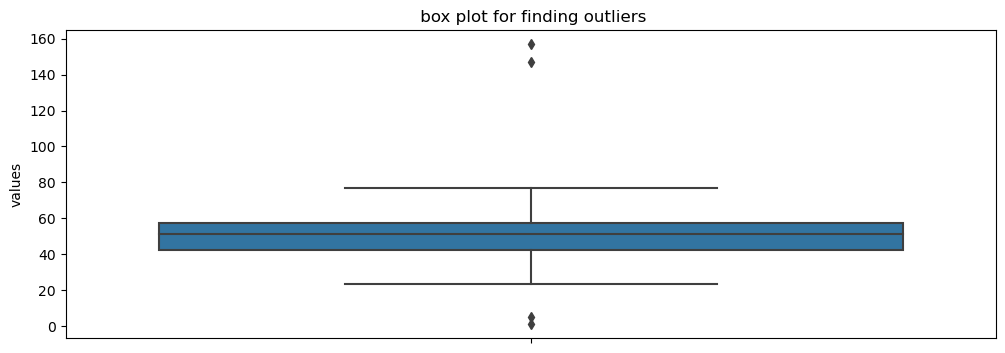

In [25]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df,y='values')
plt.title(" box plot for finding outliers")
plt.show()

In [36]:
df['z-score']=zscore(df['values'])
df['outliers_z']=df['z-score'].apply(lambda x:'outlier'if abs(x)>3 else 'normal')
print(df[df['outliers_z']=='outlier'])

     values   z-score outliers_z
102   147.0  5.197388    outlier
103   157.0  5.740540    outlier


In [45]:
q1=df['values'].quantile(0.25)
q3=df['values'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df['outlier_iqr']=df['values'].apply(lambda x: 'outlier' if (x<lower_bound or x>upper_bound) else 'normal')
print(df[df['outlier_iqr']=='outlier'])

     values   z-score outliers_z outlier_iqr
100     5.0 -2.515368     normal     outlier
101     1.0 -2.732628     normal     outlier
102   147.0  5.197388    outlier     outlier
103   157.0  5.740540    outlier     outlier


In [48]:
np.random.seed(39)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([5,1,147,157])
data=np.concatenate([data,outliers])

q1=np.percentile(data,25)
q2=np.median(data)
q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)

iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

outliers=data[(data<lower_bound) | (data>upper_bound)]


print(f"5-number summary:\min:{min_value},q1:{q1},median:{q2},q3:{q3},max:{max_value}")
print(f"IQR:{iqr}")
print(f"lower bound:{lower_bound},upper bound:{upper_bound}")
print(f"outlier: {outliers}")
      

5-number summary:\min:1.0,q1:42.068796844130866,median:51.147728160784666,q3:57.11493861447227,max:157.0
IQR:15.046141770341407
lower bound:19.499584188618755,upper bound:79.68415126998438
outlier: [  5.   1. 147. 157.]
